<a href="https://colab.research.google.com/github/Dohyeon-Kim1/Object-Background_StyleTransfer_withText/blob/sooking87/detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip isntall fvcore

ERROR: unknown command "isntall" - maybe you meant "install"


In [3]:
!pip isntall omegaconf

ERROR: unknown command "isntall" - maybe you meant "install"


In [4]:
!pip install fvcore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61429 sha256=2271e3967b6c40deddd43d3b94efed2cfdbd00ffcc6c8eb2526d440fe7424947
  Stored in directory: /root/.cache/pip/wheels/83/42/02/66178d16e5c44dc26d309931834956baeda371956e86fbd876
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=e33b7c7da6758ce14e2d3b9cea71b7b1d40d2375142e21a5071904b7118a4067
  Stored in directory: /root/.cache/pip/wheels/c1/13/6d/441d8f2af76ee6d2a3e67eebb1d0c556fefcee0a8b32266a8e
Successfully built fvcore iopath


In [5]:
!pip install omegaconf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=c09cf1cb97602f55b31b0c3e9ea661ed3a523516e67495e39d7a0a0244674ccb
  Stored in directory: /root/.cache/pip/wheels/23/cf/80/f3efa822e6ab23277902ee9165fe772eeb1dfb8014f359020a
Successfully built antlr4-python3-runtime


In [6]:
!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: torch 2.0.0+cu118
Uninstalling torch-2.0.0+cu118:
  Successfully uninstalled torch-2.0.0+cu118
Found existing installation: torchvision 0.15.1+cu118
Uninstalling torchvision-0.15.1+cu118:
  Successfully uninstalled torchvision-0.15.1+cu118
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 803.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 48.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.10.1+cu111 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.10.1+cu111 which is incompatible.
torchaudio 2.0.1+cu118 requires torch=

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

fatal: destination path 'detectron2' already exists and is not an empty directory.


In [10]:
import os
os.chdir("/content/gdrive/MyDrive/detectron2")

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14952, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 14952 (delta 15), reused 20 (delta 7), pack-reused 14916
Receiving objects: 100% (14952/14952), 6.07 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (10837/10837), done.
Updating files: 100% (819/819), done.


In [11]:
# Import pacakges
import os
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

# Setup logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [12]:
# Create and set model's config
cfg = get_cfg()
cfg.merge_from_file("/content/gdrive/MyDrive/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Create model
predictor = DefaultPredictor(cfg)

[04/06 13:33:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 124MB/s]                           


In [16]:
print(os.getcwd())
# Load image (np.array type)
img = cv2.imread("../samples/images.jpg")

# Inferrence
outputs = predictor(img)

# Tensor: gpu -> cpu
outputs['instances'] = outputs['instances'].to("cpu")

/content/gdrive/MyDrive/detectron2


/usr/local/lib/python3.9/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [17]:
masks = outputs['instances'].pred_masks
obj_mask = np.sum(np.asarray(masks.unsqueeze(-1)),0)
bg_mask = 1-obj_mask

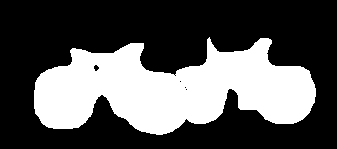

In [18]:
# obj_mask (black:0, white:1)
cv2_imshow(255*obj_mask)

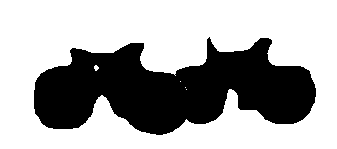

In [19]:
# bg_mask (black:0, white:1)
cv2_imshow(255*bg_mask)

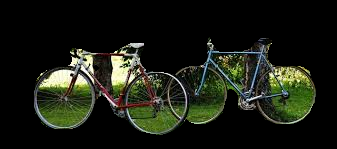

In [20]:
# Only object
cv2_imshow(obj_mask*img)